## Figure 4 plot

In [1]:
import scipy.cluster.hierarchy as sch
import statsmodels.api as sm
from skbio.stats.ordination import pcoa
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import ward, fcluster
from scipy import stats
from scipy import cluster
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from statannot import add_stat_annotation
sns.set()

In [2]:
## Figure 4A - Clustering analysis

asv_rel = pd.read_csv('data/asv-rel.csv', index_col=0)
asv_baseline = asv_rel.filter(regex="D0$")
asv_baseline_id = [i.split('D')[0] for i in asv_baseline.columns]
asv_baseline.columns = asv_baseline_id
samplelabel = asv_baseline.columns

AAD = ['S2D0', 'S10D0', 'S15D0', 'S16D0', 'S24D0', 'S1D0',
          'S5D0', 'S6D0', 'S7D0', 'S13D0', 'S19D0', 'S20D0', 'S21D0']
AADv2 = [i.split('D')[0] for i in AAD]

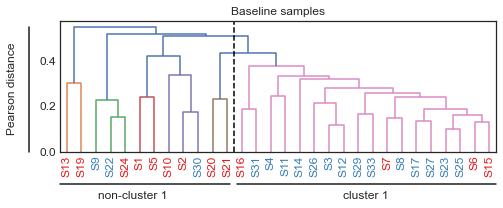

In [3]:
plt.style.use('seaborn-white')
cm = 1/2.54
fig,ax=plt.subplots(figsize=(18*cm,8*cm))
fig.subplots_adjust(bottom=0.2)

dendrogram = sch.dendrogram(sch.linkage(asv_baseline.T, method='average',
                            metric='correlation'), color_threshold=0.4, labels=samplelabel)
for tick_labels in ax.axes.get_xticklabels():
    tick_text = tick_labels.get_text()
    if tick_text in AADv2:
        tick_labels.set_color('#e41a1c')
        tick_text=tick_text.split('D')[0]
    else:
        tick_labels.set_color('#377eb8')
        tick_text=tick_text.split('D')[0]
ax.set_title('Baseline samples',fontsize=12)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=12,rotation=90)

# Group cut off at 0.4
plt.axhline(linestyle='--', y=-0.5,c='r')
plt.axvline(linestyle='--', x=120,c='black')

trans = ax.get_xaxis_transform()
trans1 = ax.get_yaxis_transform()
ax.annotate('non-cluster 1', xy=(50, -0.3), xycoords=trans, ha="center", va="top",fontsize=12)
ax.plot([0,117],[-0.25,-0.25], color="k", transform=trans, clip_on=False)
ax.annotate('cluster 1', xy=(210, -0.3), xycoords=trans, ha="center", va="top",fontsize=12)
ax.plot([122,300],[-0.25,-0.25], color="k", transform=trans, clip_on=False)

ax.annotate('Pearson distance', xy=(-0.12, 0.28), xycoords=trans1, ha="left", va="center",rotation=90, fontsize=12)
ax.plot([-0.07,-0.07],[0,0.55], color="k", transform=trans1, clip_on=False)
plt.tight_layout()
plt.savefig('plots/Figure4A_clustering.svg',dpi=300)


In [4]:
## Figure 4B - Ruminococaccae relative abundance box plots

asv_rel_f = pd.read_csv('data/asv-level-5-rel.csv', index_col=0)
asv_rel_f_rumino = asv_rel_f[asv_rel_f.index.str.contains('Ruminococcaceae')]
asv_rumino_baseline = asv_rel_f_rumino.filter(regex='D0$')
asv_rumino_baseline = asv_rumino_baseline[asv_rumino_baseline.sum(
    axis=1) != 0]
rumino_baseline_sum = asv_rumino_baseline.sum(axis=0).to_frame()

AAD = ['S2D0', 'S10D0', 'S15D0', 'S16D0', 'S24D0', 'S1D0',
       'S5D0', 'S6D0', 'S7D0', 'S13D0', 'S19D0', 'S20D0', 'S21D0']
nonAAD = ['S3D0', 'S4D0', 'S8D0', 'S9D0', 'S11D0', 'S12D0', 'S14D0', 'S17D0',
          'S22D0', 'S23D0', 'S25D0', 'S26D0', 'S27D0', 'S29D0', 'S30D0', 'S31D0', 'S33D0']

# reformat for rumino in AAD and non-AAD groups
rumino_baseline_sum.columns = ['value']
rumino_baseline_sum.loc[AAD, 'Group'] = 'AAD'
rumino_baseline_sum.loc[nonAAD, 'Group'] = 'non-AAD'

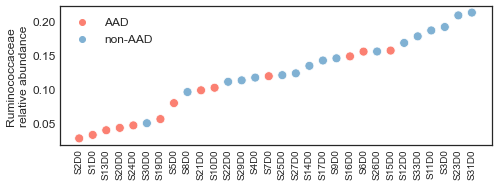

In [5]:
reorderedid = rumino_baseline_sum['value'].sort_values(ascending=True).index
rumino_baseline_sum_ascen = rumino_baseline_sum.loc[reorderedid]
xtickid = reorderedid.tolist()

plt.style.use('seaborn-white')
cm = 1/2.54
fig, ax = plt.subplots(figsize=(18*cm, 7*cm))
fontvalue = 12
sns.scatterplot(x=range(0, 30, 1), y='value', data=rumino_baseline_sum_ascen,
                hue='Group', palette=['#fb8072', '#80b1d3'], s=80)
ax.set_ylabel('Ruminococcaceae \nrelative abundance', fontsize=fontvalue)

ax.tick_params(axis='x', labelsize=10, direction="in", rotation=45)
ax.tick_params(axis='y', labelsize=fontvalue, direction="in")

ax.set_xticks(np.arange(len(xtickid)))
ax.set_xticklabels(xtickid, rotation=90)
ax.legend(fontsize=fontvalue)
plt.tight_layout()
plt.savefig('plots/Figure4B_Rumino_abundance.svg', dpi=300)

In [6]:
## Figure 4C - F. prausnitzii qPCR box plots
df = pd.read_csv('data/faecali_qpcr.csv')
orderedid = ['S2D0', 'S1D0', 'S13D0', 'S20D0', 'S24D0', 'S30D0', 'S19D0', 'S5D0', 'S8D0', 'S21D0', 'S10D0', 'S22D0', 'S29D0', 'S4D0',
             'S7D0', 'S25D0', 'S27D0', 'S14D0', 'S17D0', 'S9D0', 'S16D0', 'S6D0', 'S26D0', 'S15D0', 'S12D0', 'S33D0', 'S11D0', 'S3D0', 'S23D0', 'S31D0']
df['Sample ID'] = pd.Categorical(
    df['Sample ID'], categories=orderedid, ordered=True)
df['100*normalized.1 (GC/uL)'] = df['normalized.1 (GC/uL)']*100 # dilution factor

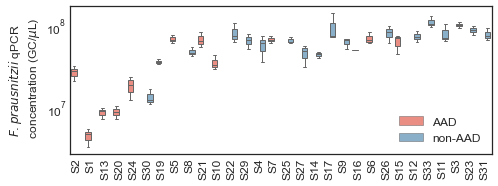

In [7]:
plt.style.use('seaborn-white')
cm = 1/2.54
fig, ax = plt.subplots(figsize=(18*cm, 7*cm))
fontvalue = 12
sns.boxplot(data=df, x='Sample ID', y='100*normalized.1 (GC/uL)', hue='Group',
            palette=['#fb8072', '#80b1d3'], order=orderedid, linewidth=1)  # s=200,
ax.set_xlabel(xlabel='', fontsize=fontvalue)
ax.set_ylabel(
    ylabel='$\it{F.prausnitzii}$ qPCR \n  concentration (GC/'+r'$\mu$'+'L)', fontsize=fontvalue)
ax.tick_params(axis='x', rotation=90, labelsize=12)
ax.tick_params(axis='y', labelsize=fontvalue)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [i.split('D')[0] for i in labels]
ax.set_xticklabels(labels)

plt.yscale('log')
plt.tight_layout()
plt.legend(fontsize=fontvalue, markerscale=3, loc='lower right')
plt.savefig('plots/Figure4C_normalized_faecali_concentration_boxplt.svg',dpi=300)

In [8]:
## Figure 4D - correlation
df = pd.read_csv('data/faecali_qpcr_16S_corr.csv', index_col=False)
print(stats.spearmanr(df['Faecali species qPCR concentration.1.median'], df['Rumino 16S abundance']))

SpearmanrResult(correlation=0.8487208008898777, pvalue=3.1143392525566432e-09)


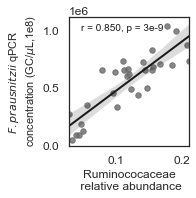

In [9]:
sns.set(style='white', font="Arial")
cm = 1/2.54
fig, ax = plt.subplots(figsize=(5.5*cm, 6*cm))
sns.regplot(data=df, y='Faecali species qPCR concentration.1.median', x='Rumino 16S abundance',
            scatter_kws={'s': 30}, line_kws={'lw': 2, 'color': 'k'}, color='dimgray')
ax.set_ylabel(
    '$\it{F.prausnitzii}$ qPCR\n concentration (GC/'+r'$\mu$'+'L,1e8)', fontsize=11)
ax.set_xlabel('Ruminococaceae\n relative abundance', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.yaxis.set_ticks(np.arange(0, 1.5e6, 0.5e6))

ax.yaxis.get_offset_text().set_fontsize(12)
plt.text(0.1, 0.9, 'r = 0.850, p = 3e-9', fontsize=10,
         transform=ax.transAxes, color='k')
plt.savefig("plots/Figure4D_correlation_v5_median.svg", dpi=300)


In [10]:
## Figure 4E - probability analysis